In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print(np.version.version)
names = os.listdir('./data/')
variables = ["GHIP_SMP22_Avg", "GHIP_SMP11_Avg", "TempAr_Avg", "GHIT_SMP22_Avg"]

1.20.1


```python
for file in names[1:]:
    data2 =  pd.read_csv(("./data/"+ file), index_col=["TIMESTAMP"])
    try:
        df = pd.concat([df, data2[variables]], axis=0)
    except:
        df = pd.concat([df, data2["TempAr_Avg"]], axis=0)

df.drop([0], axis=1)
```

In [6]:
df = pd.DataFrame([], columns=variables)
df_GHIP_SMP22_Avg = pd.DataFrame([], columns=["GHIP_SMP22_Avg"])
df_GHIP_SMP11_Avg = pd.DataFrame([],columns=["GHIP_SMP11_Avg"])
df_TempAr_Avg = pd.DataFrame([],columns=["TempAr_Avg"])
df_GHIT_SMP22_Avg = pd.DataFrame([],columns=["GHIT_SMP22_Avg"])

for f in names[0:]:
    data2 =  pd.read_csv(("./data/"+ names[3]), index_col=["TIMESTAMP"])

    if variables[0] in data2.columns:
        df_GHIP_SMP22_Avg = pd.concat([df_GHIP_SMP22_Avg, data2[variables[0]]])
        df_GHIP_SMP22_Avg[variables[0]] = df_GHIP_SMP22_Avg[0]
        df_GHIP_SMP22_Avg = df_GHIP_SMP22_Avg.drop([0],axis=1)
    if variables[1] in data2.columns:
        df_GHIP_SMP11_Avg = pd.concat([df_GHIP_SMP11_Avg, data2[variables[1]]])
        df_GHIP_SMP11_Avg[variables[1]] = df_GHIP_SMP11_Avg[0]
        df_GHIP_SMP11_Avg = df_GHIP_SMP11_Avg.drop([0],axis=1)
    if variables[2] in data2.columns:
        df_TempAr_Avg = pd.concat([df_TempAr_Avg, data2[variables[2]]])
        df_TempAr_Avg[variables[2]] = df_TempAr_Avg[0]
        df_TempAr_Avg = df_TempAr_Avg.drop([0],axis=1)
    if variables[3] in data2.columns:
        df_GHIT_SMP22_Avg = pd.concat([df_GHIT_SMP22_Avg, data2[variables[3]]])
        df_GHIT_SMP22_Avg[variables[3]] = df_GHIT_SMP22_Avg[0]
        df_GHIT_SMP22_Avg = df_GHIT_SMP22_Avg.drop([0],axis=1)

    # Concatenate all data
    temp_df = pd.concat([df_GHIP_SMP22_Avg, df_GHIP_SMP11_Avg,df_TempAr_Avg,df_GHIT_SMP22_Avg], axis=1)
    df = pd.concat([df, temp_df])

### Cleaning dataset. The data is in string format, i'm casing it to float

df = df.iloc[2:].reset_index()
drop_index = df[df["index"]=="TS"].index
df= df.drop(drop_index)
drop_index = df[df["TempAr_Avg"]=="Avg"].index
df= df.drop(drop_index)
df = df.set_index(["index"], drop=True)
df = df.astype(float, errors = 'raise')
df

,GHIP_SMP22_Avg,GHIP_SMP11_Avg,TempAr_Avg,GHIT_SMP22_Avg
index,,,,
2017-11-30 17:31:00,663.0,661.2,23.19801,652.4
2017-11-30 17:32:00,614.5,610.2,23.24622,605.3
2017-11-30 17:31:00,663.0,661.2,23.19801,652.4
2017-11-30 17:32:00,614.5,610.2,23.24622,605.3
2017-11-30 18:51:00,207.1,200.1,23.26507,200.0
...,...,...,...,...
2017-12-04 13:22:00,817.0,813.0,26.95458,802.0
2017-12-04 13:23:00,963.0,959.0,26.79201,956.0
2017-12-04 13:24:00,1019.0,1017.0,26.69907,1016.0


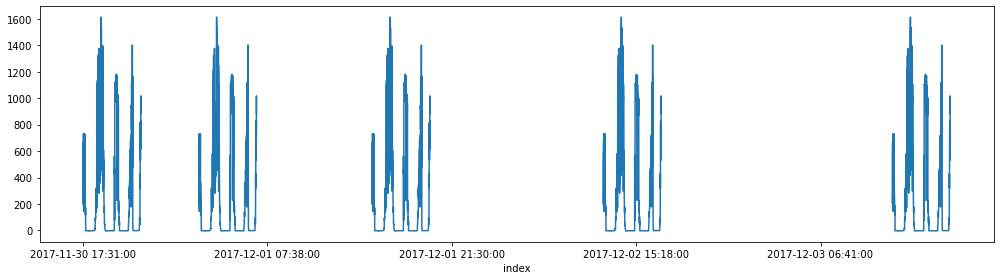

In [7]:
fig, ax1 = plt.subplots(1,1,figsize=(14,4))
df["GHIP_SMP11_Avg"].plot(ax=ax1)
plt.tight_layout()

In [226]:
## Save the dataset to a file

df.to_csv("dados_projeto.csv")